## 뉴럴네트워크 모델 / MNIST

### 사용 패키지

In [4]:
import random
import time

import numpy as np

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from keras import losses
from keras import backend as K

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import json

In [59]:
# Constants & Functions
model_name = 'mnist_cnn'

def get_hot_idx(arr):
    return arr.index(max(arr))

def save_to_json_file(data, filename):
    with open(filename, 'w') as outfile:
        json.dump(data, outfile)
    print(filename + ' 저장완료')
    
def get_round_array(array, decimal):
    return [round(e, decimal) for e in array]

current_milli_time = lambda: int(round(time.time() * 1000))

### 데이터

In [35]:
# 데이터 관련 파라메터 정의
img_rows, img_cols = 28, 28
num_of_feature = img_rows * img_cols 

num_of_class = 10
num_of_trainset = 10000
num_of_testset = 10000

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)[:num_of_trainset]
Y_tarin = Y_train[:num_of_trainset]
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)[:num_of_testset]
Y_test = Y_test[:num_of_testset]

input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_of_class)
Y_test = keras.utils.to_categorical(Y_test, num_of_class)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(Y_tarin.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(Y_test.shape[0], 'test samples')

X_train shape: (10000, 28, 28, 1)
10000 train samples
10000 train samples
10000 test samples
10000 test samples


### 모델구축

In [49]:
# 모델 구축 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_of_class, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

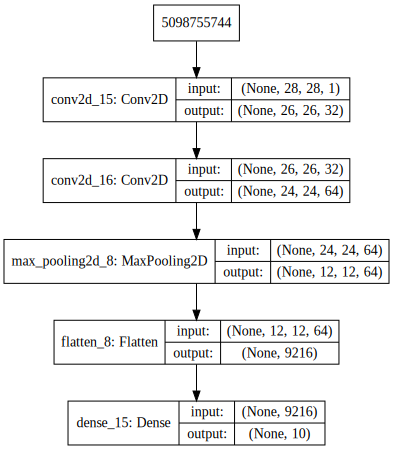

In [50]:
# 구축된 모델 구조 시각화 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 모델 학습

In [51]:
# 모델 피팅
print(X_train.shape[0], 'train input samples')
print(Y_tarin.shape[0], 'train target samples')
model.fit(X_train, Y_train[:num_of_trainset],
          epochs=3,
          batch_size=32,
          verbose=1,
          validation_data=(X_test, Y_test))

10000 train input samples
10000 train target samples
Train on 10000 samples, validate on 10000 samples
Epoch 1/3
10000/10000 [==============================] - 30s 3ms/step - loss: 0.3425 - acc: 0.8944 - val_loss: 0.1233 - val_acc: 0.9643
Epoch 2/3
10000/10000 [==============================] - 29s 3ms/step - loss: 0.1043 - acc: 0.9683 - val_loss: 0.0872 - val_acc: 0.9729
Epoch 3/3
10000/10000 [==============================] - 28s 3ms/step - loss: 0.0672 - acc: 0.9796 - val_loss: 0.0767 - val_acc: 0.9752


### 성능 확인

In [52]:
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07665459038931877
Test accuracy: 0.9752


### 내 데이터로 테스트

In [68]:
print("내 데이터로 테스트")

# 이미지 데이터 로드 (pixel 값 배열)
print("데이터 로드")
with open('./data/mnist_testing/images_not_normal.json') as data_file:
    data = json.load(data_file)
images = np.zeros((len(data), 784))
for i in range(len(data)):
    images[i] = data[i]

# 정답 데이터 로드 
with open('./data/mnist_testing/correctValues.json') as data_file:
    data = json.load(data_file)
correct_vals = np.zeros((len(data), 10))
for i in range(len(data)):
    correct_vals[i] = data[i]

# CNN에 맞게 데이터 변경
images = images.reshape(images.shape[0], img_rows, img_cols, 1)
images /= 255

# 결과를 저장할 객체 생성
result = {
    'model_name' : 'Convolutional Neural Network',
    "short_name": "CNN",
    'performance' : {},
    'predict' : []
}

# 각 인스턴스 예측
print("각 인스턴스 예측")
cnt_correct = np.zeros(10)
cnt_real = np.zeros(10)
cnt_pred = np.zeros(10)

# 시간 재기 
time_start = current_milli_time()
for i in range(len(images)):
    model.predict_proba(instance)[0].tolist()
time_required = current_milli_time() - time_start

for i in range(len(images)):
    instance = images[i:i+1]
    real = correct_vals[i].tolist()
    pred_proba = model.predict_proba(instance)[0].tolist()
    real_num = get_hot_idx(real)
    pred_num = get_hot_idx(pred_proba)
    cnt_real[real_num] += 1
    cnt_pred[pred_num] += 1
    if real_num is pred_num :
        cnt_correct[real_num] += 1
        
    result['predict'].append({
        'real': real_num,
        'pred': pred_num,
        'pred_proba': get_round_array(pred_proba, 2)
    })

result['performance']['required_time'] = time_required
result['performance']['accuracy'] = np.average(cnt_correct)
result['performance']['recall'] = (cnt_correct / cnt_real).tolist()
result['performance']['precision'] = get_round_array((cnt_correct / cnt_pred).tolist(), 3)

print(result['model_name'])
print(result['short_name'])
print(result['performance']['required_time'])
print(result['performance']['accuracy'])
print(result['performance']['recall'])
print(result['performance']['precision'])

내 데이터로 테스트
데이터 로드
각 인스턴스 예측
Convolutional Neural Network
CNN
12020
971.8
[0.985, 0.985, 0.977, 0.977, 0.967, 0.975, 0.972, 0.961, 0.952, 0.967]
[0.974, 0.972, 0.954, 0.978, 0.986, 0.971, 0.987, 0.973, 0.975, 0.949]


### 모델 저장

In [62]:
from keras.models import load_model
model.save(model_name+'.h5')

### 예측 결과 저장

In [66]:
# print(result)
save_to_json_file(result, model_name+'__result.json')

mnist_cnn__result.json 저장완료
